In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from outliers import smirnov_grubbs as grubbs

df = pd.read_csv(r'C:\Users\Frank\Desktop\PCIC\Tercer Semestre\wald_1x.csv', header = None, sep = '\t')
df = df.rename(columns = {0:'Eje x', 1:'Eje y'})
df.head()

,Eje x,Eje y
0,20.4,203.3
1,88.9,232.3
2,72.4,211.0
3,97.3,207.6
4,86.1,188.1


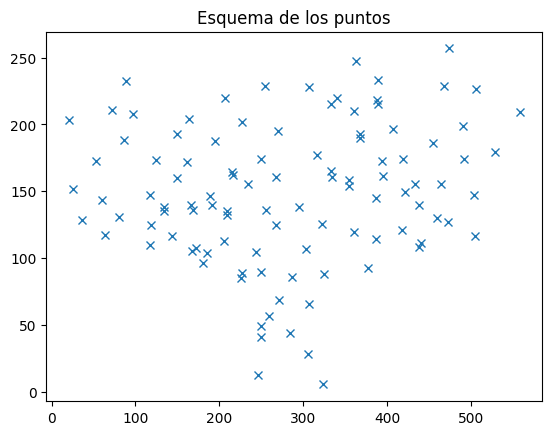

In [2]:
x = np.array(df['Eje x'])
y = np.array(df['Eje y'])

fig, ax = plt.subplots()
ax.plot(x, y, 'x')
ax.set_title('Esquema de los puntos')
plt.show()

In [3]:
print("Eje X")
print('Media: {}'.format(round(df['Eje x'].mean(), 2)))
print('Desviación estándar: {}'.format(round(df['Eje x'].std(), 2)))
print("=======================")
print("Eje Y")
print('Media: {}'.format(round(df['Eje y'].mean(), 2)))
print('Desviación estándar: {}'.format(round(df['Eje y'].std(), 2)))

Eje X
Media: 280.66
Desviación estándar: 132.11
Eje Y
Media: 148.55
Desviación estándar: 52.92


In [4]:
# Prueba inicial de anomalías.
pop = np.array(list(df['Eje x']))
max_out = grubbs.max_test_outliers(pop, 0.05)
min_out = grubbs.min_test_outliers(pop, 0.05)
print("Anomalías extremas (Máximas): {}".format(max_out))
print("Anomalías extremas (Mínimas): {}".format(min_out))

Anomalías extremas (Máximas): []
Anomalías extremas (Mínimas): []


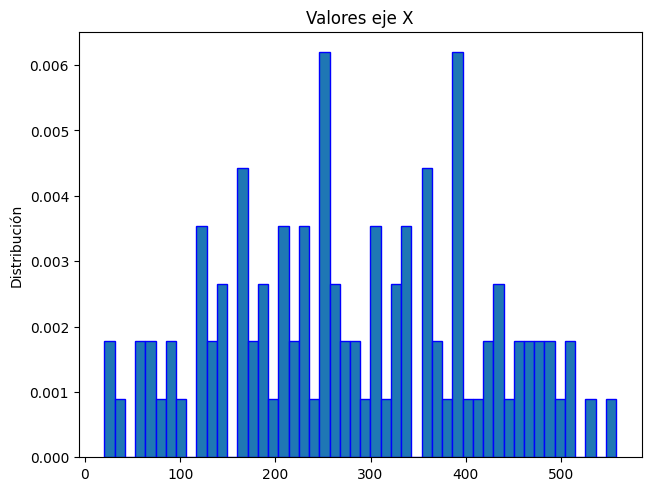

In [5]:
def graph_pob(population, save_name):
    fig, ax = plt.subplots(1, 1, sharey = True, layout = 'constrained')
    ax.hist(population, bins = 50, density = True, fill = True, edgecolor = 'blue')
    ax.set_ylabel('Distribución')
    ax.set_title('Valores eje X')
    ##plt.savefig(r'C:\Users\Frank\Documents\GitHub\PCIC\Detección de Anomalías\Imágenes\{}.png'.format(save_name))
    plt.show()

graph_pob(pop, "Población_Gauss_10_3")
# Así que se vea muy gaussiana no sé eh.

In [6]:
mean = round(df['Eje x'].mean(), 2)
std = round(df['Eje y'].std(), 2)

def addEvaluate(x_col, alpha):
    for i in range(50):
        pos_value = round(mean + i*10, 2)
        neg_value = round(mean - i*10, 2)
        aux_array = np.append(np.append(pop, pos_value), neg_value)
        max_test = grubbs.max_test_outliers(aux_array, alpha)
        min_test = grubbs.min_test_outliers(aux_array, alpha)
        if len(max_test) == 0 and len(min_test) == 0:
            continue
        elif len(max_test) == 1 and len(min_test) == 0:
            dist = round(abs(max_test[0] - mean), 2)
            print('Positivo: {}. Negativo: {}'.format(pos_value, neg_value))
            print("Hay anomalía máxima: {}".format(max_test[0]))
            print("Distancia de la media: {}".format(dist))
        elif len(max_test) == 0 and len(min_test) == 1:
            dist = round(abs(mean - min_test[0] ), 2)
            print('Positivo: {}. Negativo: {}'.format(pos_value, neg_value))
            print("Hay anomalía mínima: {}".format(min_test[0]))
            print("Distancia de la media: {}".format(dist))
        elif len(max_test) == 1 and len(min_test) == 1:
            max_dist = round(abs(max_test[0] - mean), 2)
            min_dist = round(abs(mean - min_test[0]), 2)
            print('Positivo: {}. Negativo: {}'.format(pos_value, neg_value))
            print("Hay anomalías en ambos casos. Max: {}. Min: {}".format(max_test[0], min_test[0]))
            print("Distancia Max: {}".format(max_dist))
            print("Distancia Min: {}".format(min_dist))
        print('------------')
    print("==========================================")

addEvaluate(pop, 0.05)

Positivo: 750.66. Negativo: -189.34
Hay anomalías en ambos casos. Max: 750.66. Min: -189.34
Distancia Max: 470.0
Distancia Min: 470.0
------------
Positivo: 760.66. Negativo: -199.34
Hay anomalías en ambos casos. Max: 760.66. Min: -199.34
Distancia Max: 480.0
Distancia Min: 480.0
------------
Positivo: 770.66. Negativo: -209.34
Hay anomalías en ambos casos. Max: 770.66. Min: -209.34
Distancia Max: 490.0
Distancia Min: 490.0
------------


In [7]:
addEvaluate(pop, 0.1)

Positivo: 720.66. Negativo: -159.34
Hay anomalías en ambos casos. Max: 720.66. Min: -159.34
Distancia Max: 440.0
Distancia Min: 440.0
------------
Positivo: 730.66. Negativo: -169.34
Hay anomalías en ambos casos. Max: 730.66. Min: -169.34
Distancia Max: 450.0
Distancia Min: 450.0
------------
Positivo: 740.66. Negativo: -179.34
Hay anomalías en ambos casos. Max: 740.66. Min: -179.34
Distancia Max: 460.0
Distancia Min: 460.0
------------
Positivo: 750.66. Negativo: -189.34
Hay anomalías en ambos casos. Max: 750.66. Min: -189.34
Distancia Max: 470.0
Distancia Min: 470.0
------------
Positivo: 760.66. Negativo: -199.34
Hay anomalías en ambos casos. Max: 760.66. Min: -199.34
Distancia Max: 480.0
Distancia Min: 480.0
------------
Positivo: 770.66. Negativo: -209.34
Hay anomalías en ambos casos. Max: 770.66. Min: -209.34
Distancia Max: 490.0
Distancia Min: 490.0
------------


In [8]:
addEvaluate(pop, 0.2)

Positivo: 690.66. Negativo: -129.34
Hay anomalías en ambos casos. Max: 690.66. Min: -129.34
Distancia Max: 410.0
Distancia Min: 410.0
------------
Positivo: 700.66. Negativo: -139.34
Hay anomalías en ambos casos. Max: 700.66. Min: -139.34
Distancia Max: 420.0
Distancia Min: 420.0
------------
Positivo: 710.66. Negativo: -149.34
Hay anomalías en ambos casos. Max: 710.66. Min: -149.34
Distancia Max: 430.0
Distancia Min: 430.0
------------
Positivo: 720.66. Negativo: -159.34
Hay anomalías en ambos casos. Max: 720.66. Min: -159.34
Distancia Max: 440.0
Distancia Min: 440.0
------------
Positivo: 730.66. Negativo: -169.34
Hay anomalías en ambos casos. Max: 730.66. Min: -169.34
Distancia Max: 450.0
Distancia Min: 450.0
------------
Positivo: 740.66. Negativo: -179.34
Hay anomalías en ambos casos. Max: 740.66. Min: -179.34
Distancia Max: 460.0
Distancia Min: 460.0
------------
Positivo: 750.66. Negativo: -189.34
Hay anomalías en ambos casos. Max: 750.66. Min: -189.34
Distancia Max: 470.0
Dista

In [9]:
addEvaluate(pop, 0.5)

Positivo: 640.66. Negativo: -79.34
Hay anomalías en ambos casos. Max: 640.66. Min: -79.34
Distancia Max: 360.0
Distancia Min: 360.0
------------
Positivo: 650.66. Negativo: -89.34
Hay anomalías en ambos casos. Max: 650.66. Min: -89.34
Distancia Max: 370.0
Distancia Min: 370.0
------------
Positivo: 660.66. Negativo: -99.34
Hay anomalías en ambos casos. Max: 660.66. Min: -99.34
Distancia Max: 380.0
Distancia Min: 380.0
------------
Positivo: 670.66. Negativo: -109.34
Hay anomalías en ambos casos. Max: 670.66. Min: -109.34
Distancia Max: 390.0
Distancia Min: 390.0
------------
Positivo: 680.66. Negativo: -119.34
Hay anomalías en ambos casos. Max: 680.66. Min: -119.34
Distancia Max: 400.0
Distancia Min: 400.0
------------
Positivo: 690.66. Negativo: -129.34
Hay anomalías en ambos casos. Max: 690.66. Min: -129.34
Distancia Max: 410.0
Distancia Min: 410.0
------------
Positivo: 700.66. Negativo: -139.34
Hay anomalías en ambos casos. Max: 700.66. Min: -139.34
Distancia Max: 420.0
Distancia M

In [10]:
addEvaluate(pop, 0.005)

In [11]:
addEvaluate(pop, 0.04)

Positivo: 760.66. Negativo: -199.34
Hay anomalías en ambos casos. Max: 760.66. Min: -199.34
Distancia Max: 480.0
Distancia Min: 480.0
------------
Positivo: 770.66. Negativo: -209.34
Hay anomalías en ambos casos. Max: 770.66. Min: -209.34
Distancia Max: 490.0
Distancia Min: 490.0
------------
